[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

## Datasets library

In [1]:
from datasets import list_datasets
list_datasets()

C:\Users\prabh\AppData\Local\Temp\ipykernel_3436\809330691.py:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  list_datasets()


['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookco

In [2]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Found cached dataset imdb (C:/Users/prabh/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [3]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [4]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [5]:
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Loading cached shuffled indices for dataset at C:\Users\prabh\.cache\huggingface\datasets\imdb\plain_text\1.0.0\d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0\cache-b30490d9bb1910a8.arrow


Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [6]:
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [7]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [8]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [9]:
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [10]:
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Loading cached shuffled indices for dataset at C:\Users\prabh\.cache\huggingface\datasets\imdb\plain_text\1.0.0\d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0\cache-25a13d1ede6e3cb3.arrow


Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [11]:
imdb['unsupervised'][:3]

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [12]:
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [14]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"Where to start...Oh yea, Message to the bad guys: When you first find the person you have been tracking (in order to kill) that witnessed a crime you committed, don't spend time talking to her so that she has yet another opportunity to get away. ...",0
1284,"By now you should already know about this film, the Jessica Simpson ""bomb"" that pretty much went straight to video (limited, anemic theatrical run). Basically, Ms. Simpson's Katie travels from a small town in Oklahoma to visit her boyfriend, to s...",0
408,Naturally I didn't watch 'GI Jane' out of choice. I was more or less forced to watch this film round my ex-girlfriends house.<br /><br />GI Jane loses its credibility straight away by trying to convince the viewer that it is potentially a real sc...,0
1282,"This motion picture has a steady, haunting pace backed up with great acting (one of Chamberlain's best performances) and a story that is revealed to us over time.<br /><br />Beyond that, the music fully establishes the mood and assists in maintai...",1
1447,"The movie had a cute opening, I truly believed I was in for one of the best romantic comedies i've seen in a while... there was something particular ""foreign"" about the way the movie was set up, realistic yet somewhat abstract and mystical. But t...",0
1144,"Bill Paxton, of Aliens, Near Dark, and Terminator fame, surprises me with his debut as director for Frailty. He hits on all cylinders, but there is one implausibility near the end that involves the FBI agent (Powers Booth) which deducts a point f...",1
1381,**May Contain Spoilers**<br /><br />A dude in a dopey-looking Kong suit (the same one used in KING KONG VS. GODZILLA in 1962) provides much of the laffs in this much-mocked monster flick. Kong is resurrected on Mondo Island and helps out the lunk...,0
181,"This movie is excellent. I found it very interesting. I thought the Wendigo legend was pretty cool. The acting was also great, as well as the costumes, production, photography, directing and script. <br /><br />A very happy family, on vacation ge...",1
1183,First animated feature film from Ireland is also one of the best animated films I've ever seen. Its a real warts and all story that is unlike any of the other Oscar nominees and any other film from this year or any other year.<br /><br />The plot...,1
1103,"If you want to remember MJ, this is a good place to start. This movie features sweet tunes, MJ as robot, and a crazy, messed-up plot. I recall, many a night, passing out to this fine feature film in college, and pondering the sheer awesomenes of ...",1


In [15]:
df.loc[0, 'text']

'It is said that David Lynch\'s films and shorts won\'t appeal to everyone. Neither will Dumbland, maybe more than ever. I have a feeling that Dumbland, as people come across it, will be a true mark of \'I get it\' or \'what the hell\'. It\'s not surrealism exactly, but absurd to the point of no return. It\'s also very, very, very stupid. But in this stupidity can be a sort of ironic intelligence to it, that the maker knows so well how childish and repugnant this is, and this self-consciousness is a plus, not a detraction. <br /><br />It\'s just a bunch of crudely drawn shorts- the kind that might not even make it on Hertzfeldt and Judge\'s Animation show (which, I might add, Lynch here has a lot in common with both directors in their work- centered on a lummox with an IQ of 20 who has a constantly quivering-with-fear wife, and a child who looks like a cross between the gingerbread man and/or an alien. The episodes include little situations like a faulty treadmill, a salesman who can r

In [16]:
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

'It is said that David Lynch\'s films and shorts won\'t appeal to everyone. Neither will Dumbland, maybe more than ever. I have a feeling that Dumbland, as people come across it, will be a true mark of \'I get it\' or \'what the hell\'. It\'s not surrealism exactly, but absurd to the point of no return. It\'s also very, very, very stupid. But in this stupidity can be a sort of ironic intelligence to it, that the maker knows so well how childish and repugnant this is, and this self-consciousness is a plus, not a detraction. It\'s just a bunch of crudely drawn shorts- the kind that might not even make it on Hertzfeldt and Judge\'s Animation show (which, I might add, Lynch here has a lot in common with both directors in their work- centered on a lummox with an IQ of 20 who has a constantly quivering-with-fear wife, and a child who looks like a cross between the gingerbread man and/or an alien. The episodes include little situations like a faulty treadmill, a salesman who can recite the Ge

In [17]:
df.label.value_counts()

0    805
1    795
Name: label, dtype: int64

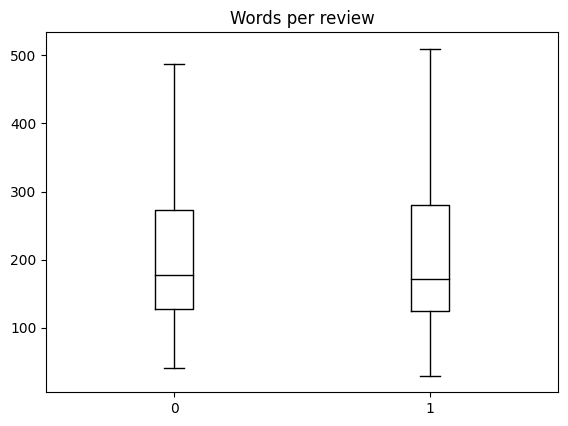

In [18]:
df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [19]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
234,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
531,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34
633,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
783,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
946,"Before Dogma 95: when Lars used movies as art, not just a story. A beautiful painting about love and death. This is one of my favorite movies of all time. The color... The music... Just perfect.",1,36
1113,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38


In [20]:
imdb.reset_format()

## Tokenizer

In [21]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Loading cached processed dataset at C:\Users\prabh\.cache\huggingface\datasets\imdb\plain_text\1.0.0\d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0\cache-053bf9b3405d65f0.arrow


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [22]:
print(imdb_encoded['train'][0])

{'text': 'It is said that David Lynch\'s films and shorts won\'t appeal to everyone. Neither will Dumbland, maybe more than ever. I have a feeling that Dumbland, as people come across it, will be a true mark of \'I get it\' or \'what the hell\'. It\'s not surrealism exactly, but absurd to the point of no return. It\'s also very, very, very stupid. But in this stupidity can be a sort of ironic intelligence to it, that the maker knows so well how childish and repugnant this is, and this self-consciousness is a plus, not a detraction. <br /><br />It\'s just a bunch of crudely drawn shorts- the kind that might not even make it on Hertzfeldt and Judge\'s Animation show (which, I might add, Lynch here has a lot in common with both directors in their work- centered on a lummox with an IQ of 20 who has a constantly quivering-with-fear wife, and a child who looks like a cross between the gingerbread man and/or an alien. The episodes include little situations like a faulty treadmill, a salesman 

## Tiny IMDB

In [23]:
import transformers
import re

[x for x in dir(transformers) if re.search(r'^AutoModel', x)]

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassification',
 'AutoModelForVision2Seq',
 'AutoModelForVisualQuestionAnswering',
 'AutoModelForZeroShotImageClassification',
 'Auto

In [24]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.weigh

In [25]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Loading cached shuffled indices for dataset at C:\Users\prabh\.cache\huggingface\datasets\imdb\plain_text\1.0.0\d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0\cache-b143ea289760a98c.arrow


Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Loading cached processed dataset at C:\Users\prabh\.cache\huggingface\datasets\imdb\plain_text\1.0.0\d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0\cache-3d7d31123cd0d574.arrow


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [26]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

TrainingArguments(
_n_gpu=0,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_toke

In [27]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

  0%|          | 0/14 [00:00<?, ?it/s]

{'loss': 0.6737, 'learning_rate': 1.1428571428571429e-05, 'epoch': 0.86}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 0.6987589001655579, 'eval_runtime': 6.1453, 'eval_samples_per_second': 1.627, 'eval_steps_per_second': 0.325, 'epoch': 1.0}
{'loss': 0.6834, 'learning_rate': 2.8571428571428573e-06, 'epoch': 1.71}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 0.6988471150398254, 'eval_runtime': 5.3713, 'eval_samples_per_second': 1.862, 'eval_steps_per_second': 0.372, 'epoch': 2.0}
{'train_runtime': 166.056, 'train_samples_per_second': 0.602, 'train_steps_per_second': 0.084, 'train_loss': 0.6642635975565229, 'epoch': 2.0}


In [28]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

  0%|          | 0/2 [00:00<?, ?it/s]

PredictionOutput(predictions=array([[ 0.12079502, -0.25774044],
       [ 0.10780492, -0.18341374],
       [ 0.12982832, -0.2017913 ],
       [ 0.1144672 , -0.19722731],
       [ 0.13072357, -0.24869224],
       [ 0.11333157, -0.23312367],
       [ 0.13274471, -0.19023712],
       [ 0.14776243, -0.22076571],
       [ 0.12123288, -0.19231959],
       [ 0.08505594, -0.18599086]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64), metrics={'test_loss': 0.6369038820266724, 'test_runtime': 4.6327, 'test_samples_per_second': 2.159, 'test_steps_per_second': 0.432})

In [29]:
preds.predictions.shape

(10, 2)

In [30]:
preds.predictions.argmax(axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.7

In [33]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [34]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  compute_metrics=get_accuracy,
                  args=training_args, 
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

  0%|          | 0/14 [00:00<?, ?it/s]

{'loss': 0.6297, 'learning_rate': 1.1428571428571429e-05, 'epoch': 0.86}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 0.6970708966255188, 'eval_accuracy': 0.5, 'eval_runtime': 18.5688, 'eval_samples_per_second': 0.539, 'eval_steps_per_second': 0.108, 'epoch': 1.0}
{'loss': 0.6572, 'learning_rate': 2.8571428571428573e-06, 'epoch': 1.71}


  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 0.6909928321838379, 'eval_accuracy': 0.5, 'eval_runtime': 14.7433, 'eval_samples_per_second': 0.678, 'eval_steps_per_second': 0.136, 'epoch': 2.0}
{'train_runtime': 434.7443, 'train_samples_per_second': 0.23, 'train_steps_per_second': 0.032, 'train_loss': 0.6252258334841047, 'epoch': 2.0}


## Training run

In [35]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [36]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:


trainer.evaluate()

In [ ]:
trainer.save_model()

In [ ]:
model_name

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

In [ ]:
classifier('This was beyond incredible')